# EDA Floods o Inundaciones


Usando dataset ../../Data/03Limpio/03desastreslimpio.csv

## Objetivo

### Identificar condiciones y patrones relacionadas a inundaciones

## Importar librerías

In [31]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40)
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Cargar datos

In [32]:
df = pd.read_csv('../../Data/03Limpio/03desastreslimpio.csv')

# Verificar carga de dataset

##  Resumen básico shape, info, head

In [33]:
df.shape
# Resultado: 16636 filas y 20 columnas)

(16636, 26)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             16636 non-null  object
 1   Year               16636 non-null  int64 
 2   Seq                16636 non-null  int64 
 3   Disaster Subgroup  16636 non-null  object
 4   Disaster Type      16636 non-null  object
 5   Disaster Subtype   13313 non-null  object
 6   Country            16636 non-null  object
 7   ISO                16636 non-null  object
 8   Region             16636 non-null  object
 9   Continent          16636 non-null  object
 10  Location           14825 non-null  object
 11  Origin             4085 non-null   object
 12  Associated Dis     3593 non-null   object
 13  Dis Mag Value      16636 non-null  int64 
 14  Dis Mag Scale      15416 non-null  object
 15  Latitude           2775 non-null   object
 16  Longitude          2775 non-null   objec

In [35]:
df.head(20)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1902-0003-GTM,1902,3,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,4,8,1902,4,8,1000,0,0
4,1902-0010-GTM,1902,10,Geophysical,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,...,NaN,1902,10,24,1902,10,24,6000,0,0
5,1903-0006-CAN,1903,6,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1903,4,29,1903,4,29,76,23,0
6,1903-0012-COM,1903,12,Geophysical,Volcanic activity,Ash fall,Comoros (the),COM,Eastern Africa,Africa,...,NaN,1903,0,0,1903,0,0,17,0,0
7,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
8,1905-0005-CAN,1905,5,Geophysical,Mass movement (dry),Rockfall,Canada,CAN,Northern America,Americas,...,NaN,1905,8,13,1905,8,13,18,18,0
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


## Columns

In [36]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

# Flood filter

### Filtro principal para Flood
Selecciona solo las filas en el DataFrame donde la columna 'Disaster Type' es 'Flood'.

In [37]:
# Filtro principal para Flood
flood_filter = df['Disaster Type'] == 'Flood'
df_flood = df[flood_filter]
df_flood

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
12,1906-0023-BEL,1906,23,Hydrological,Flood,NaN,Belgium,BEL,Western Europe,Europe,...,NaN,1906,5,14,1906,5,14,6,0,0
13,1906-0024-BEL,1906,24,Hydrological,Flood,NaN,Belgium,BEL,Western Europe,Europe,...,NaN,1906,4,0,1906,4,0,0,0,0
34,1911-0002-CHN,1911,2,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1911,0,0,1911,0,0,100000,0,0
39,1915-0011-CHN,1915,11,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1915,0,0,1915,0,0,0,3000000,0
43,1917-0013-CHN,1917,13,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1917,0,0,1917,0,0,0,635000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16620,2023-0262-UGA,2023,262,Hydrological,Flood,NaN,Uganda,UGA,Eastern Africa,Africa,...,NaN,2023,4,24,2023,5,18,9,1009,0
16628,2023-0080-ZAF,2023,80,Hydrological,Flood,NaN,South Africa,ZAF,Southern Africa,Africa,...,NaN,2023,2,8,2023,2,21,17,1000,0
16629,2023-0180-ZAF,2023,180,Hydrological,Flood,NaN,South Africa,ZAF,Southern Africa,Africa,...,NaN,2023,3,23,2023,3,27,3,500,0
16631,2023-0110-ZMB,2023,110,Hydrological,Flood,Flash flood,Zambia,ZMB,Eastern Africa,Africa,...,NaN,2023,2,7,2023,3,9,0,154608,0


### Categorías de condiciones asociadas al filtro Flood: geográficas, magnitud, geolocalización, temporales, etc.

In [38]:
# Categorías geográficas de Flood
df_flood_geographical = df_flood[['Location', 'ISO', 'Country', 'Region', 'Continent']]

# Categorías de magnitud de Earthquake
df_flood_magnitude = df_flood[['Dis Mag Scale', 'Dis Mag Value']]

# Categorías de geolocalización de Flood
df_flood_geoloc = df_flood[['Latitude', 'Longitude']]

# Categorías de fecha de Flood
df_flood_temp = df_flood[['Start Month', 'Start Year', 'End Year', 'End Year']]

## Análisis geográfico de terremotos

In [39]:
df_flood_geographical.shape # (5808, 5)
df_flood_geographical.info

<bound method DataFrame.info of                                                 Location  ISO       Country  \
12                                        Louvain region  BEL       Belgium   
13                                                   NaN  BEL       Belgium   
34                                                   NaN  CHN         China   
39                                             Guangzhou  CHN         China   
43                                               Tianjin  CHN         China   
...                                                  ...  ...           ...   
16620  Kasese, Rukungiri, Mbale, Kigez, Ntokoro Distr...  UGA        Uganda   
16628  Mpumalanga, the Eastern Cape, Gauteng, KwaZulu...  ZAF  South Africa   
16629  Ingquza Hill, King Sabata Dalindyebo and Port ...  ZAF  South Africa   
16631  Namwala, Monze and Mazabuka districts; Lusaka ...  ZMB        Zambia   
16634  Sjenica and Brodarevo Novi Pazar Municipality;...  SRB        Serbia   

                Reg

### Distribución geográfica de inundaciones

#### Value counts: Contar ocurrencias de inundaciones en diferentes localizaciones, países, regiones y continentes

#### Continent

In [40]:
continent_counts = df_flood_geographical['Continent'].value_counts()
continent_counts

Asia        2407
Americas    1353
Africa      1213
Europe       678
Oceania      157
Name: Continent, dtype: int64

#### Region

In [41]:
region_counts = df_flood_geographical['Region'].value_counts()
region_counts

Southern Asia                869
South-Eastern Asia           791
South America                668
Eastern Asia                 489
Eastern Africa               469
Western Africa               312
Central America              272
Northern America             250
Southern Europe              234
Eastern Europe               234
Western Asia                 204
Northern Africa              182
Caribbean                    163
Middle Africa                162
Western Europe               140
Australia and New Zealand    111
Southern Africa               88
Central Asia                  54
Northern Europe               52
Melanesia                     38
Russian Federation            18
Micronesia                     5
Polynesia                      3
Name: Region, dtype: int64

#### Country

In [42]:
country_counts = df_flood_geographical['Country'].value_counts()
country_counts

India                             316
China                             314
Indonesia                         265
United States of America (the)    205
Brazil                            174
                                 ... 
Finland                             1
American Samoa                      1
Samoa                               1
Guadeloupe                          1
Sao Tome and Principe               1
Name: Country, Length: 191, dtype: int64

#### Location

In [43]:
location_counts = df_flood_geographical['Location'].value_counts()
location_counts

South                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  16
North                                                                                                                                                                                                                                                                                                                                                                                                                                         

## Visualizar la distribución geográfica de inundaciones a partir de value_counts usando bar charts o countplot

In [44]:
# Establecer tamaño de fuente a 10
plt.rcParams.update({'font.size': 10})

### Distribución de inundaciones por continente

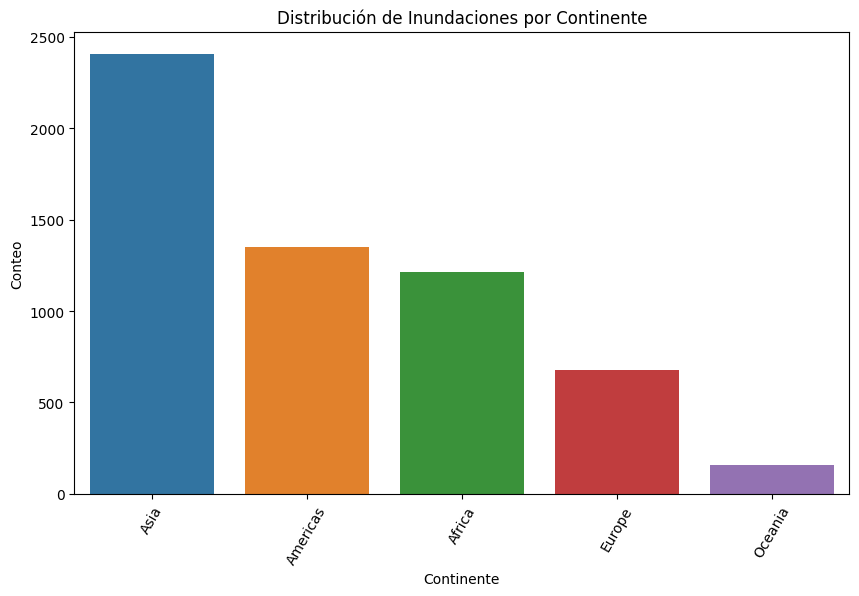

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title('Distribución de Inundaciones por Continente')
plt.xlabel('Continente')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
plt.show()

Insights sobre inundaciones en continentes:

Asia es el continente donde más inundaciones ha habido. Oceanía está muy por debajo del resto con 157.
1. Asia        2407
2. Americas    1353
3. Africa      1213
4. Europe       678
5. Oceania      157

### Region

#### Distribución de inundaciones por región

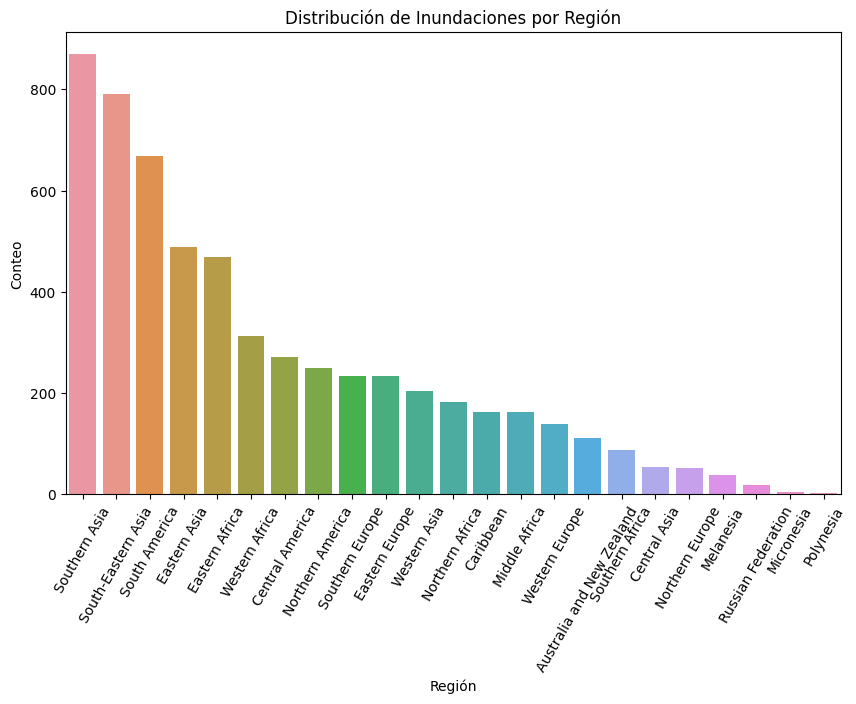

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Distribución de Inundaciones por Región')
plt.xlabel('Región')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
plt.show()

Insights sobre inundaciones en regiones: Si bien es cierto que algunas regiones de Asia están en el top 5 de inundaciones, estas se encuentran distribuidas entre diferentes regiones. Sudamérica ocupa el tercer puesto.
Polynesia, Micronesia y la Federación Rusa son las que menos inundaciones sufren.

### Country

#### Distribución de inundaciones por país

In [47]:
# Establecer tamaño de fuente a 4
plt.rcParams.update({'font.size': 4})

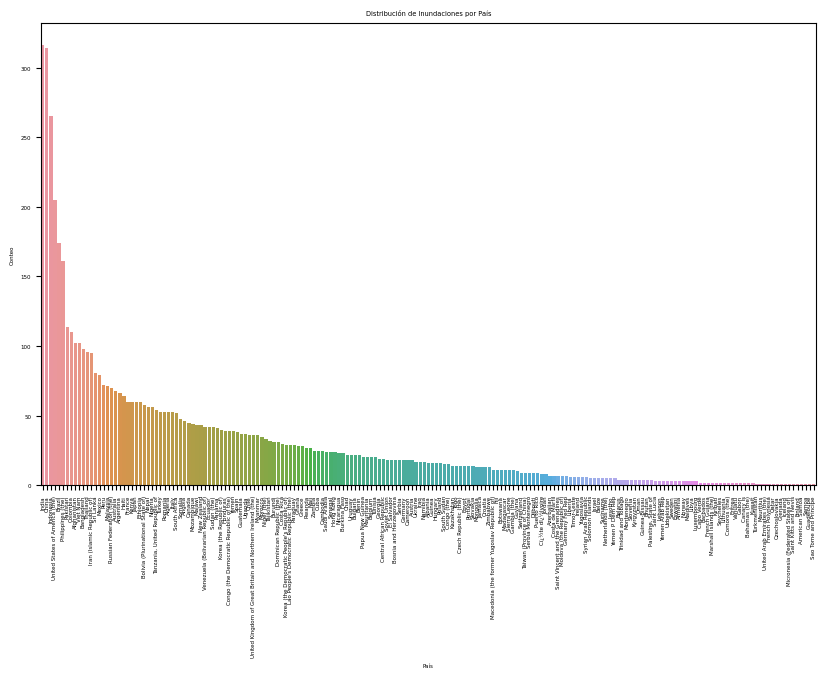

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribución de Inundaciones por País')
plt.xlabel('País')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()

In [49]:
# Establecer tamaño de fuente a 10
plt.rcParams.update({'font.size': 10})

In [50]:
# Sintetizar la información anterior en top 20 para mejorar visualización
top20_floods_countries = df_flood_geographical['Country'].value_counts().head(20)
top20_floods_countries

India                             316
China                             314
Indonesia                         265
United States of America (the)    205
Brazil                            174
Philippines (the)                 161
Pakistan                          114
Colombia                          110
Afghanistan                       102
Viet Nam                          102
Bangladesh                         98
Thailand                           96
Iran (Islamic Republic of)         95
Sri Lanka                          81
Mexico                             79
Peru                               72
Malaysia                           71
Russian Federation (the)           70
Australia                          68
Argentina                          66
Name: Country, dtype: int64

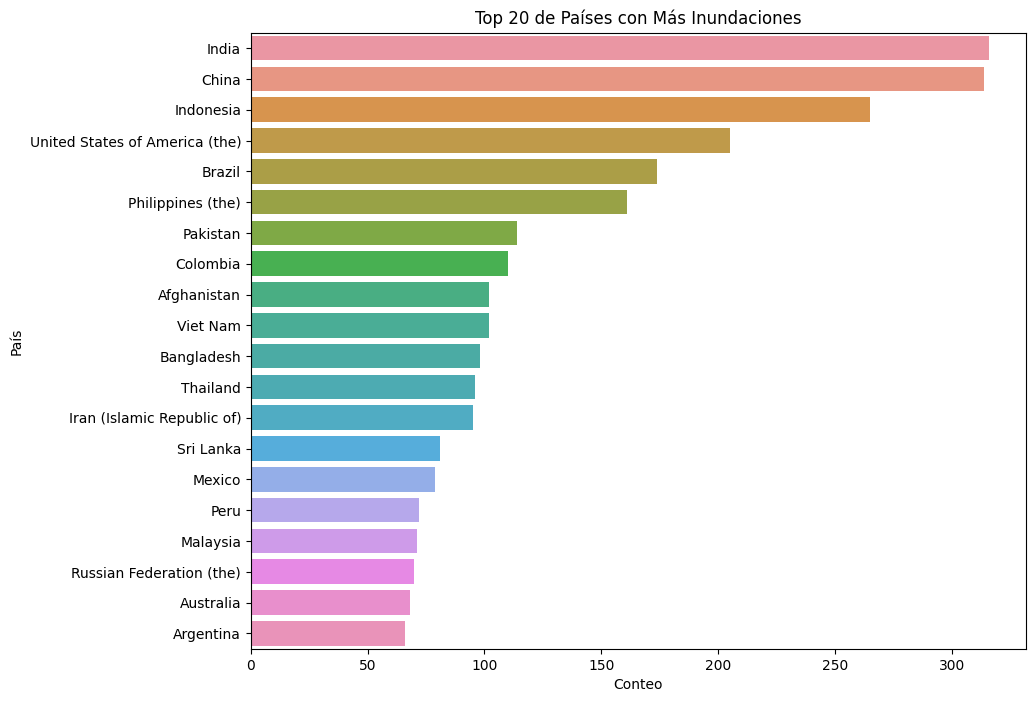

In [51]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top20_floods_countries.values, y=top20_floods_countries.index)
plt.title('Top 20 de Países con Más Inundaciones')
plt.xlabel('Conteo')
plt.ylabel('País')
plt.show()

### Location

#### Distribución de inundaciones por localidad

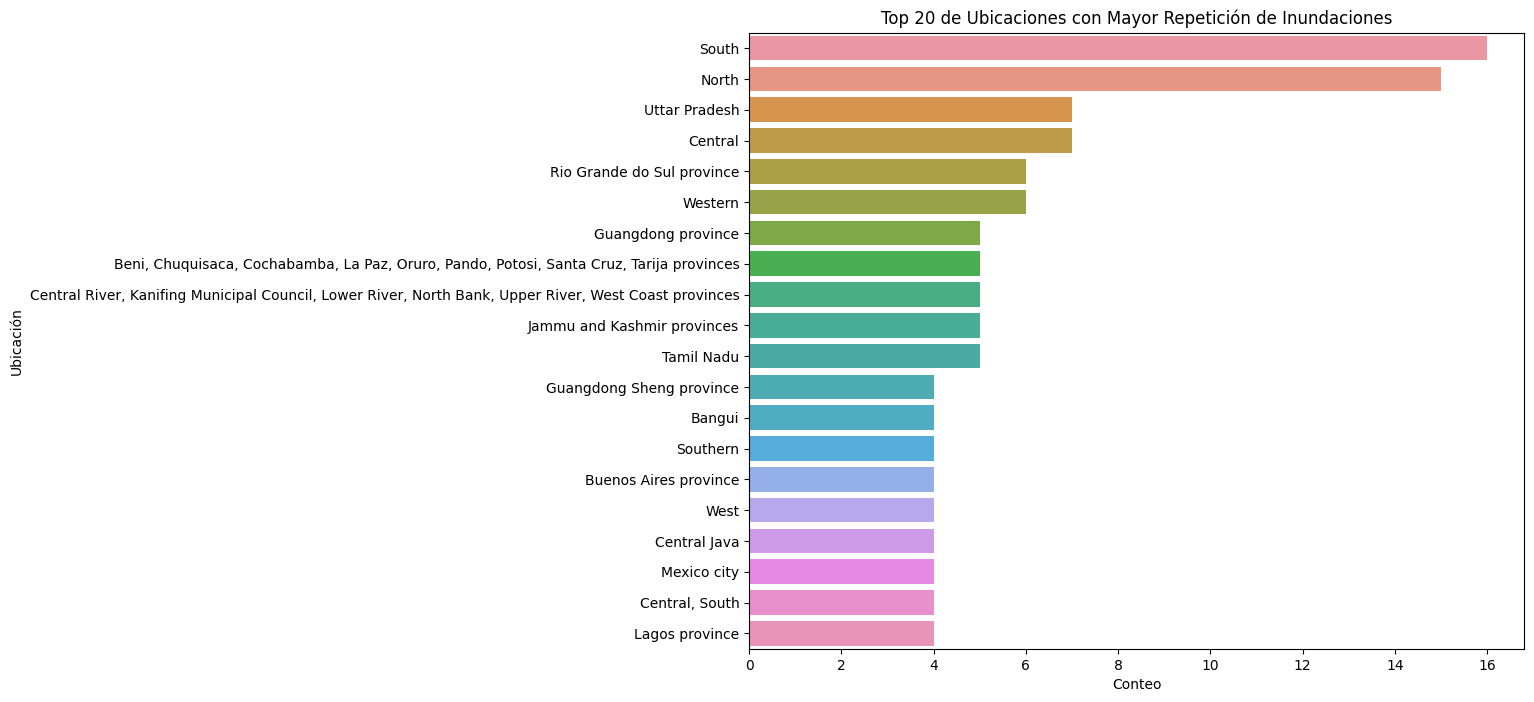

In [52]:
plt.figure(figsize=(10, 8))
sns.countplot(y=df_flood_geographical['Location'], order=df_flood_geographical['Location'].value_counts().head(20).index)
plt.title('Top 20 de Ubicaciones con Mayor Repetición de Inundaciones')
plt.xlabel('Conteo')
plt.ylabel('Ubicación')
plt.show()

y=earthquake_geographical_data['Location']: Especifica la variable que se trazará en el eje y. En este caso, queremos mostrar las ubicaciones de los terremotos.

order=earthquake_geographical_data['Location'].value_counts().head(20).index: este parámetro especifica el orden en el que deben aparecer las categorías en el eje y. Usamos el método value_counts() para obtener el recuento de ocurrencias para cada ubicación, luego usamos head(20) para seleccionar las 20 ubicaciones principales y, finalmente, .index se usa para extraer el índice (ubicaciones) de la serie resultante. Esto asegura que las ubicaciones con el conteo más alto se mostrarán en la parte superior de la gráfica.

### Repetición de inundaciones por localidades

In [53]:
location_counts = df_flood_geographical['Location'].value_counts()
repeated_fld_locations = location_counts[location_counts > 1]
repeated_fld_locations
top20_repeated_fld_locations = repeated_fld_locations.head(20)
top20_repeated_fld_locations

South                                                                                                    16
North                                                                                                    15
Uttar Pradesh                                                                                             7
Central                                                                                                   7
Rio Grande do Sul province                                                                                6
Western                                                                                                   6
Guangdong province                                                                                        5
Beni, Chuquisaca, Cochabamba, La Paz, Oruro, Pando, Potosi, Santa Cruz, Tarija provinces                  5
Central River, Kanifing Municipal Council, Lower River, North Bank, Upper River, West Coast provinces     5
Jammu and Kashmir provinces 

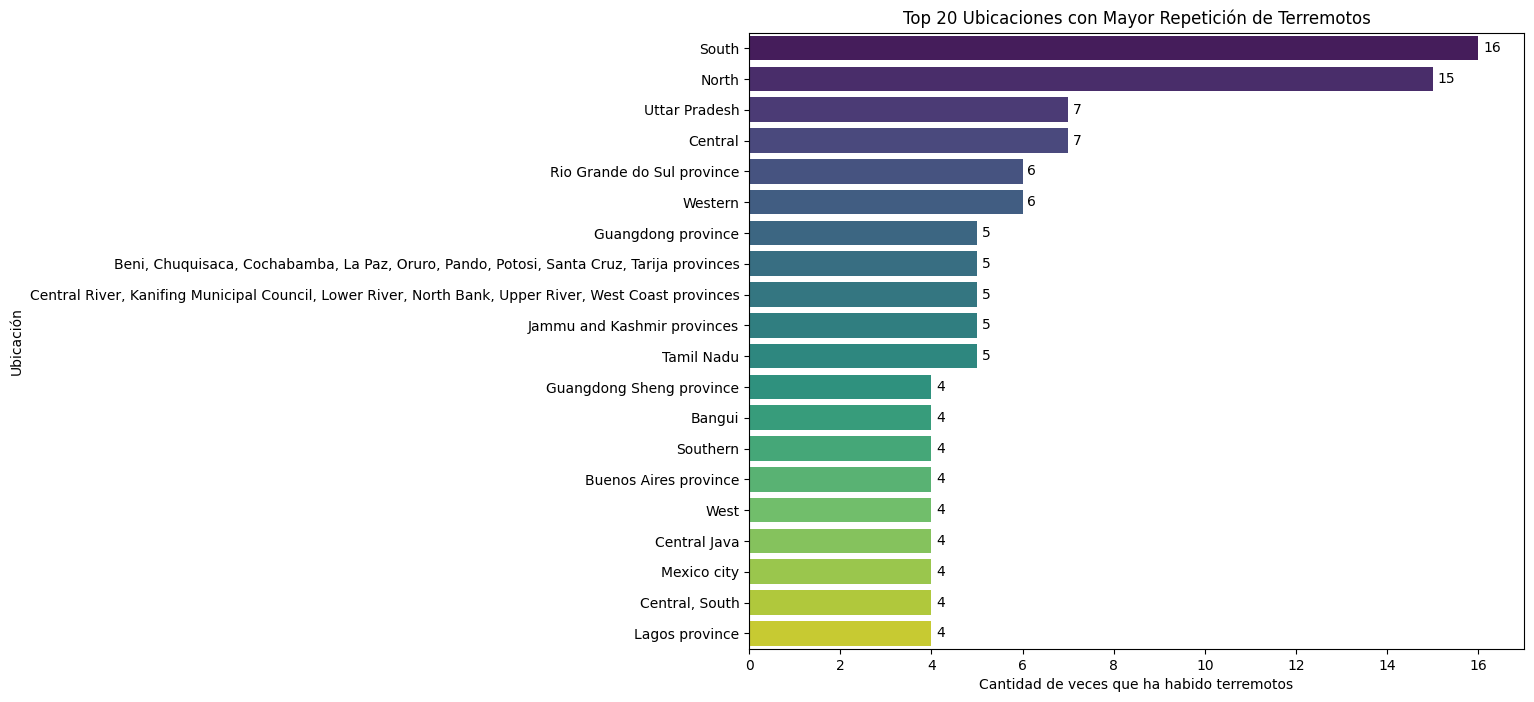

In [54]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top20_repeated_fld_locations.values, y=top20_repeated_fld_locations.index, palette='viridis')
ax.set_xlim(0, max(top20_repeated_fld_locations.values) + 1)
for i, count in enumerate(top20_repeated_fld_locations.values):
    ax.text(count + 0.1, i, int(count), ha='left', va='center')
plt.title('Top 20 Ubicaciones con Mayor Repetición de Terremotos')
plt.xlabel('Cantidad de veces que ha habido terremotos')
plt.ylabel('Ubicación')
plt.show()

Insights sobre repetición de terremotos en localidades:
1. La localidad donde más terremotos se han repetido es Yunan Province, en 14 ocasiones.
2. Le sigue Sichuan Province, otra localidad también en China, con 8. Sería interesante comprobar si se encuentran en la misma región.
3. Managua en Filipina es la tercera localidad con 4 repeticiones.

# Visualizaciones

## Correlaciones

In [55]:
df_flood.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Dis Mag Value', 'Dis Mag Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
       'End Year', 'End Month', 'End Day', 'Total Deaths', 'Total Affected',
       'Total Damages Adj'],
      dtype='object')

### Segmentación de correlaciones: por tipo, geográfica y temporal

In [56]:
df_flood_corr_type = df_flood[['Disaster Subtype', 'Associated Dis']]
df_flood_corr_geo = df_flood[['Continent', 'Region', 'Country', 'Origin']]
df_flood_corr_temp = df_flood[['Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']]
df_flood_corr_magn = df_flood[['Dis Mag Value', 'Dis Mag Scale']]
df_flood_corr_geoloc = df_flood[['Latitude', 'Longitude']]

C:\Users\AleEng\AppData\Local\Temp\ipykernel_10932\3509072124.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_flood.corr(), annot=True, cmap='Blues', cbar=False)


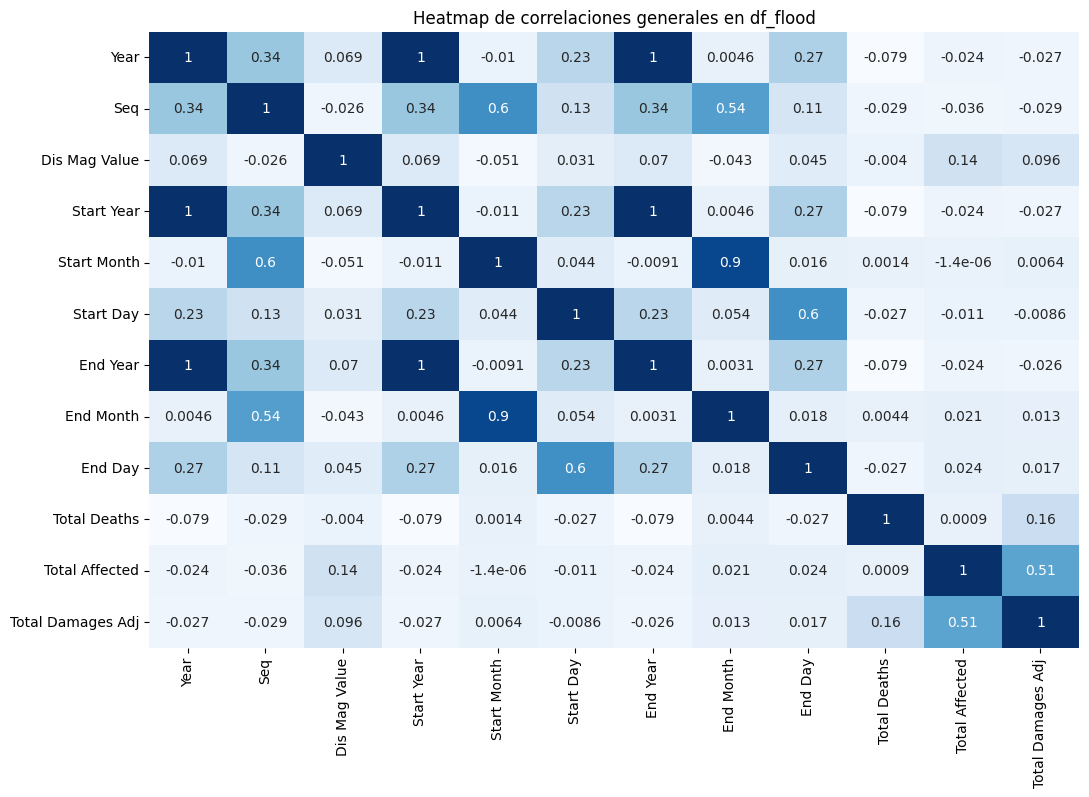

In [57]:
# Heatmap general de df_flood
plt.figure(figsize=(12, 8))
sns.heatmap(df_flood.corr(), annot=True, cmap='Blues', cbar=False)
plt.title('Heatmap de correlaciones generales en df_flood')
plt.show()

### Correlaciones por subtipo de desastre y desastre asociado

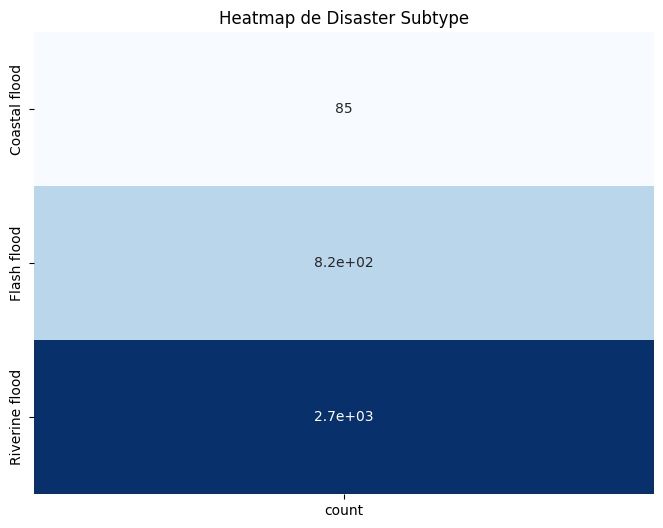

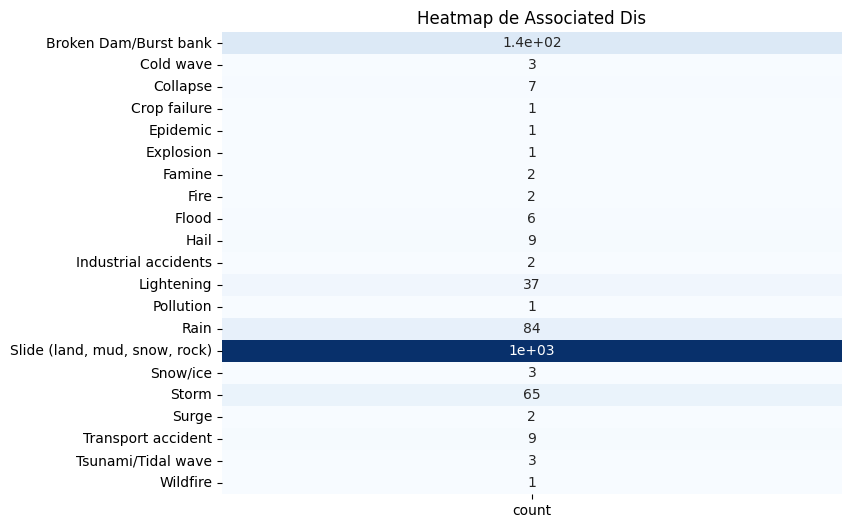

In [58]:
for column in df_flood_corr_type:
    crosstab = pd.crosstab(df_flood_corr_type[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Las correlaciones más altas en relación a tipología son:

+ Subtipo de desastre:
    * Inundación fluvial
    * Inundación repentina
    * Inundación costera

+ Desastre asociado:
    * Deslizamientos o Slide (land, mud, snow, rock)
    * Presa rota, banco reventado
    * Lluvia
    * Tormenta
    * Inundación relámpago

### Correlaciones geográficas

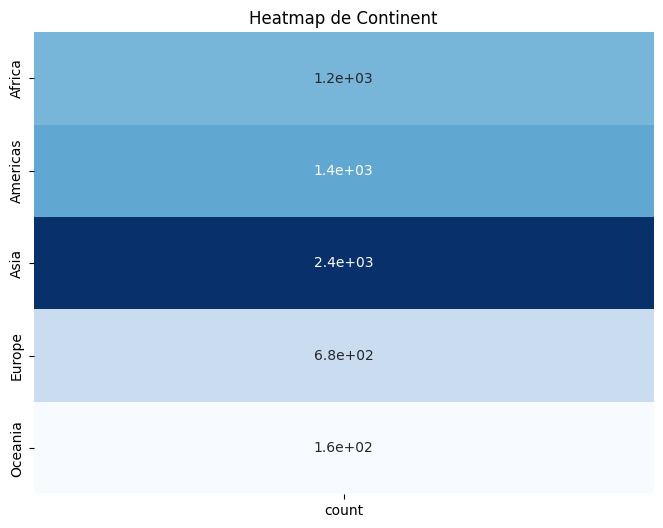

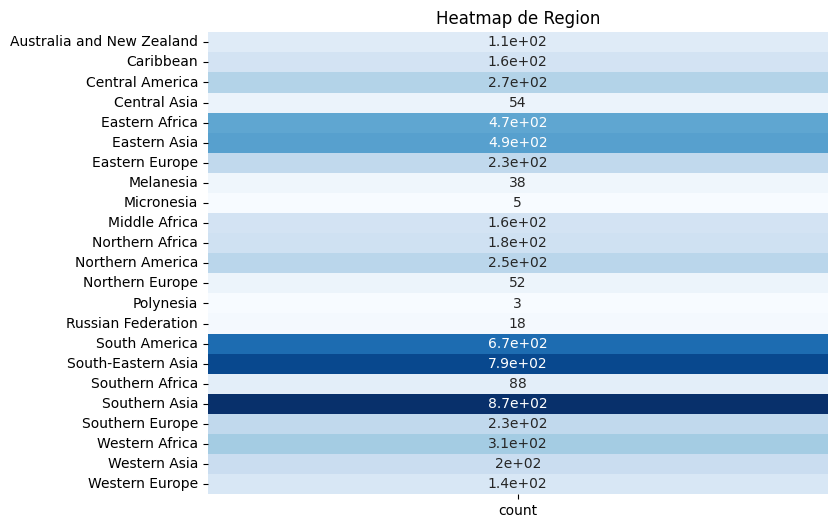

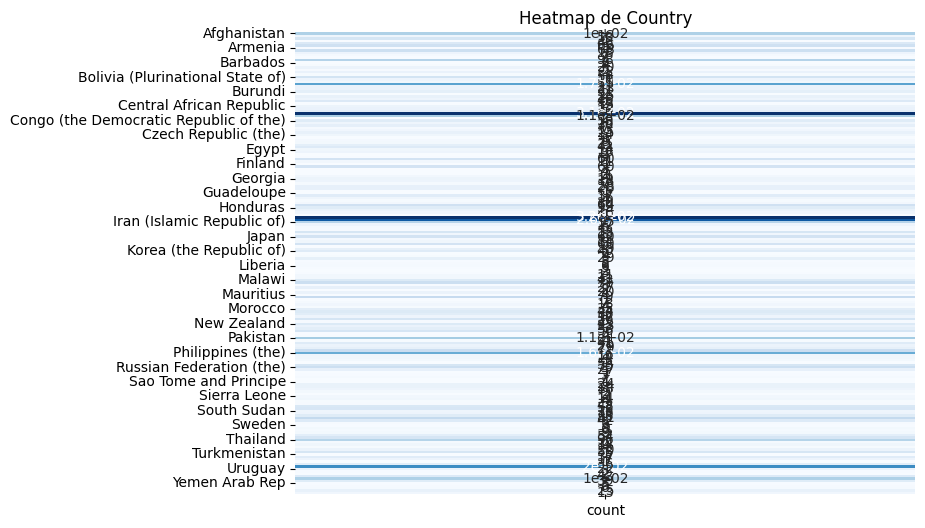

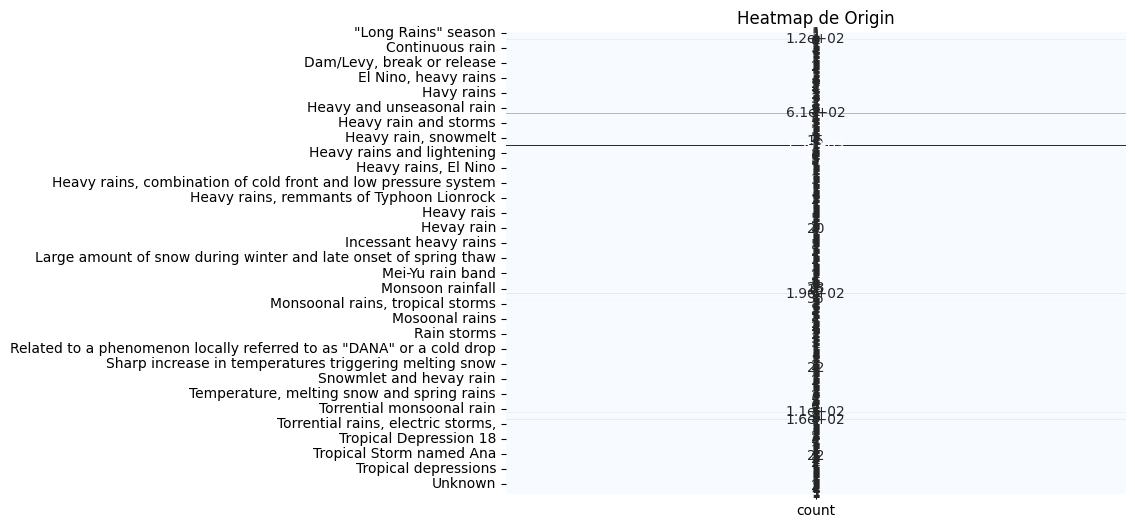

In [59]:
for column in df_flood_corr_geo:
    crosstab = pd.crosstab(df_flood_corr_geo[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

### Correlaciones temporales

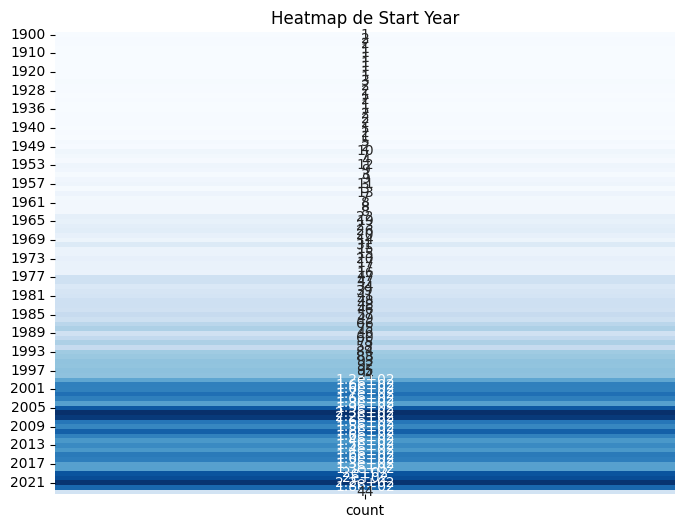

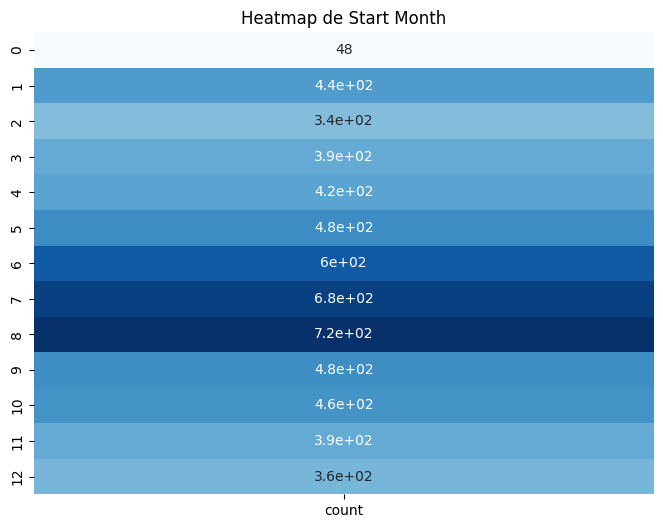

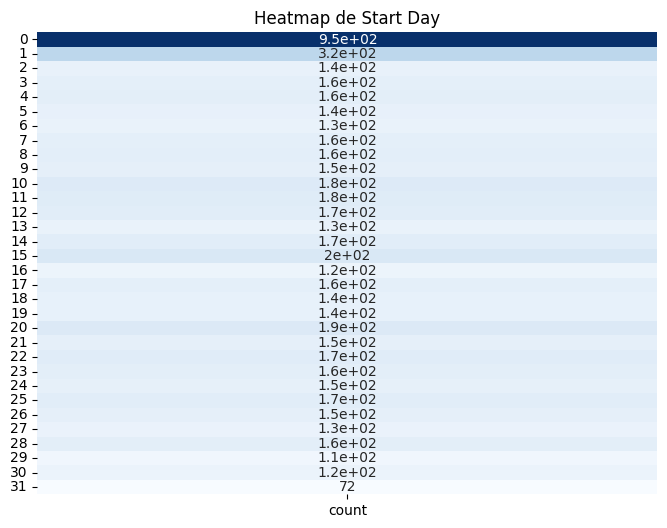

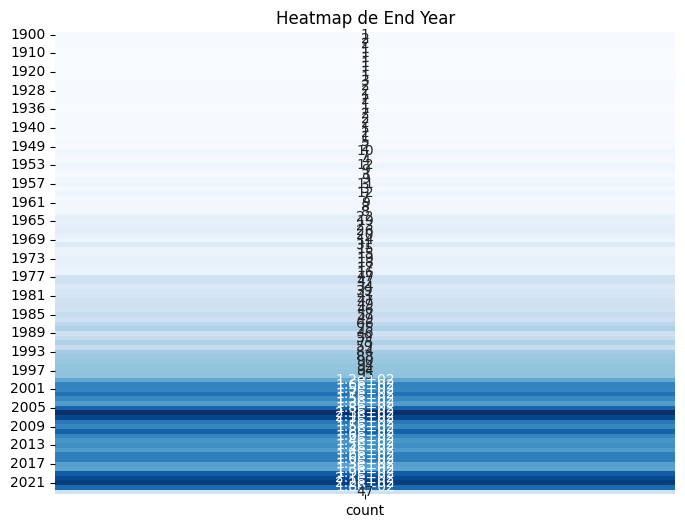

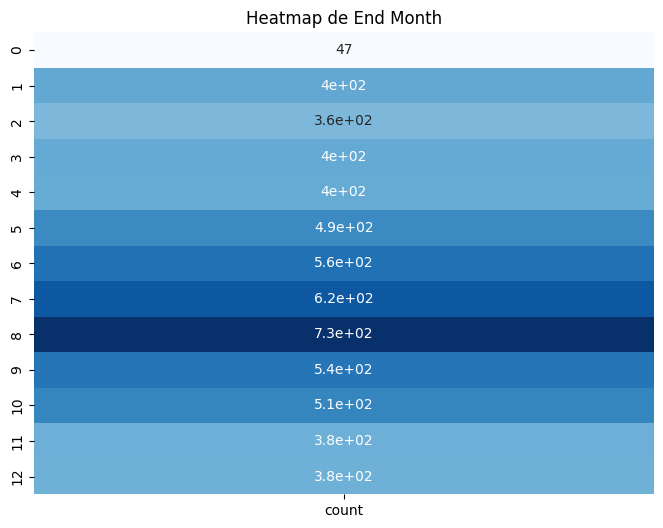

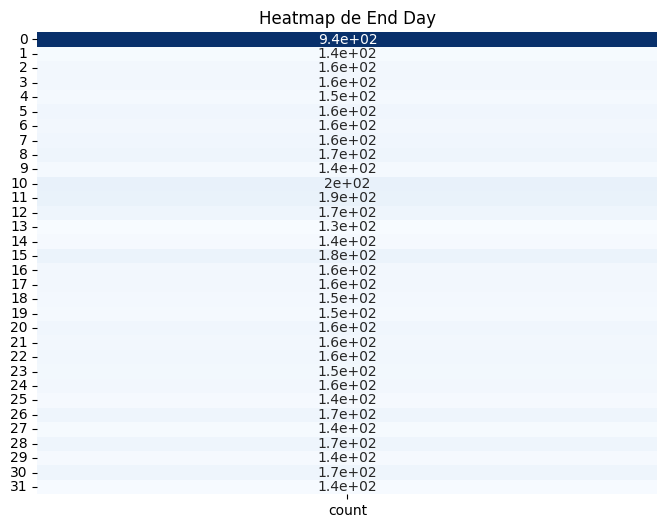

In [61]:
for column in df_flood_corr_temp:
    crosstab = pd.crosstab(df_flood_corr_temp[column], columns='count')
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
    plt.title(f"Heatmap de {column}")
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# Diagrama Sankey para Flujo de Subtipos de Inundaciones

In [ ]:
import plotly.graph_objects as go

# Agrupar por columnas relevantes y calcular los conteos
df_sankey = df_flood.groupby(['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']).size().reset_index(name='Count')

# Crear las etiquetas de nodos para el diagrama Sankey
nodes = pd.unique(df_sankey[['Disaster Type', 'Disaster Subtype', 'Associated Dis', 'Region']].values.ravel('K'))

# Crear enlaces entre nodos
link_source = [nodes.tolist().index(x) for x in df_sankey['Disaster Type']]
link_target = [nodes.tolist().index(x) for x in df_sankey['Disaster Subtype']]
link_value = df_sankey['Count']

# Crear el diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes
    ),
    link=dict(
        source=link_source,
        target=link_target,
        value=link_value,
        hovertemplate='Source: %{source.label}<br>Target: %{target.label}<br>Value: %{value}'
    )
)])

# Personalizar el diagrama Sankey
fig.update_layout(
    title='Diagrama Sankey de Flujo de Subtipo de Inundaciones',
    font=dict(size=10),
    height=600,
    width=800
)

# Show the Sankey diagram
fig.show()


# Conclusiones

# Recomendaciones

# Guardar dataset en csv

In [ ]:
# df.to_csv('../../Data/02ParaLimpiar/02desastres_fillna.csv', index=False, sep=';', encoding='utf-8')

Dataset con valores rellenados y/o filas vacías borradas.